In [1]:
# grader-required-cell

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

In [4]:
import rarfile

def extract_rar(rar_path, extract_path):
    with rarfile.RarFile(rar_path, 'r') as rar:
        rar.extractall(extract_path)
    print("Extraction completed successfully.")

# Example usage:
rar_path = "/content/Dataset.rar"
extract_path = "/content"
extract_rar(rar_path, extract_path)

Extraction completed successfully.


In [5]:
import os
import shutil
import random
from keras.preprocessing.image import ImageDataGenerator

base_dir='Dataset'
# Define paths
dataset_folder = base_dir
train_folder = "train"
val_folder = "valid"

# Create folders for training and validation data
os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# List all classes in the dataset folder
classes = os.listdir(dataset_folder)

# Split data into training and validation sets
for class_name in classes:
    class_folder = os.path.join(dataset_folder, class_name)
    images = os.listdir(class_folder)
    random.shuffle(images)
    split_index = int(0.8 * len(images))

    train_images = images[:split_index]
    val_images = images[split_index:]

    # Move images to respective folders
    for image in train_images:
        src = os.path.join(class_folder, image)
        dest = os.path.join(train_folder, class_name, image)
        os.makedirs(os.path.dirname(dest), exist_ok=True)
        shutil.copy(src, dest)

    for image in val_images:
        src = os.path.join(class_folder, image)
        dest = os.path.join(val_folder, class_name, image)
        os.makedirs(os.path.dirname(dest), exist_ok=True)
        shutil.copy(src, dest)


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def image_generator():
    train_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_directory(directory=train_folder,
                                                        target_size=(150, 150),
                                                        batch_size=110,
                                                        class_mode='binary')

    validation_datagen = ImageDataGenerator(rescale=1./255)


    validation_generator = validation_datagen.flow_from_directory(directory=val_folder,
                                                                batch_size=110,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
    return train_generator,validation_generator


In [7]:
train_generator, validation_generator = image_generator()

Found 13344 images belonging to 28 classes.
Found 3336 images belonging to 28 classes.


In [11]:
# 3 Concolutional Layers With Dropout
from tensorflow.keras import optimizers, losses

def model(train_generator,validation_generator):

    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(28,activation='softmax')

    ])
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizers.RMSprop(learning_rate=0.001),
                  metrics=['accuracy'])
    history = model.fit(x=train_generator,
                        epochs=10,
                        validation_data=validation_generator)

    return history,model
hist_3,model_3 = model(train_generator, validation_generator)

Epoch 1/10
122/122 [==============================] - 15s 107ms/step - loss: 2.7459 - accuracy: 0.1960 - val_loss: 1.8511 - val_accuracy: 0.4433
Epoch 2/10
122/122 [==============================] - 13s 102ms/step - loss: 1.5366 - accuracy: 0.4989 - val_loss: 1.0441 - val_accuracy: 0.6646
Epoch 3/10
122/122 [==============================] - 13s 105ms/step - loss: 1.0634 - accuracy: 0.6458 - val_loss: 0.8127 - val_accuracy: 0.7539
Epoch 4/10
122/122 [==============================] - 13s 102ms/step - loss: 0.8252 - accuracy: 0.7193 - val_loss: 0.6882 - val_accuracy: 0.7815
Epoch 5/10
122/122 [==============================] - 14s 111ms/step - loss: 0.6555 - accuracy: 0.7795 - val_loss: 0.5839 - val_accuracy: 0.8159
Epoch 6/10
122/122 [==============================] - 13s 107ms/step - loss: 0.5379 - accuracy: 0.8137 - val_loss: 0.5120 - val_accuracy: 0.8336
Epoch 7/10
122/122 [==============================] - 13s 103ms/step - loss: 0.4366 - accuracy: 0.8502 - val_loss: 0.4343 - val_ac

In [12]:
import pickle

# Define the path to save the model
model_path = "Model_with_3_conv_layers.pkl"

# Save the trained model using pickle
with open(model_path, 'wb') as f:
    pickle.dump(model_3, f)

print("Model saved successfully at:", model_path)


Model saved successfully at: Model_with_3_conv_layers.pkl


In [13]:
# 2 Convolutional Layers

from tensorflow.keras import optimizers, losses

def model(train_generator,validation_generator):

    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(28,activation='softmax')

    ])
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizers.RMSprop(learning_rate=0.001),
                  metrics=['accuracy'])
    history = model.fit(x=train_generator,
                        epochs=10,
                        validation_data=validation_generator)

    return history,model
hist_2,model_2 = model(train_generator, validation_generator)

Epoch 1/10
122/122 [==============================] - 17s 125ms/step - loss: 2.4809 - accuracy: 0.2729 - val_loss: 1.7165 - val_accuracy: 0.4592
Epoch 2/10
122/122 [==============================] - 13s 103ms/step - loss: 1.3744 - accuracy: 0.5564 - val_loss: 1.0921 - val_accuracy: 0.6382
Epoch 3/10
122/122 [==============================] - 12s 97ms/step - loss: 0.9107 - accuracy: 0.6915 - val_loss: 0.8933 - val_accuracy: 0.7041
Epoch 4/10
122/122 [==============================] - 12s 100ms/step - loss: 0.6220 - accuracy: 0.7872 - val_loss: 0.7482 - val_accuracy: 0.7530
Epoch 5/10
122/122 [==============================] - 13s 109ms/step - loss: 0.4391 - accuracy: 0.8474 - val_loss: 0.6878 - val_accuracy: 0.7683
Epoch 6/10
122/122 [==============================] - 12s 99ms/step - loss: 0.3061 - accuracy: 0.8955 - val_loss: 0.6393 - val_accuracy: 0.8010
Epoch 7/10
122/122 [==============================] - 13s 103ms/step - loss: 0.2260 - accuracy: 0.9250 - val_loss: 0.7039 - val_accu

In [14]:
import pickle

# Define the path to save the model
model_path = "Model_with_2_conv_layers.pkl"

# Save the trained model using pickle
with open(model_path, 'wb') as f:
    pickle.dump(model_2, f)

print("Model saved successfully at:", model_path)


Model saved successfully at: Model_with_2_conv_layers.pkl


In [15]:
# 1 Convolutional Layer

from tensorflow.keras import optimizers, losses

def model(train_generator,validation_generator):
    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(28,activation='softmax')

    ])
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizers.RMSprop(learning_rate=0.001),
                  metrics=['accuracy'])
    history = model.fit(x=train_generator,
                        epochs=10,
                        validation_data=validation_generator)

    return history,model
hist_1,model_1 = model(train_generator, validation_generator)

Epoch 1/10
122/122 [==============================] - 15s 102ms/step - loss: 2.1995 - accuracy: 0.3324 - val_loss: 1.4178 - val_accuracy: 0.5375
Epoch 2/10
122/122 [==============================] - 14s 116ms/step - loss: 1.1855 - accuracy: 0.6111 - val_loss: 0.9684 - val_accuracy: 0.6891
Epoch 3/10
122/122 [==============================] - 13s 103ms/step - loss: 0.7551 - accuracy: 0.7463 - val_loss: 0.7323 - val_accuracy: 0.7626
Epoch 4/10
122/122 [==============================] - 15s 120ms/step - loss: 0.5046 - accuracy: 0.8291 - val_loss: 0.6459 - val_accuracy: 0.7809
Epoch 5/10
122/122 [==============================] - 13s 110ms/step - loss: 0.3261 - accuracy: 0.8850 - val_loss: 0.7250 - val_accuracy: 0.7785
Epoch 6/10
122/122 [==============================] - 14s 111ms/step - loss: 0.2225 - accuracy: 0.9212 - val_loss: 0.5919 - val_accuracy: 0.8201
Epoch 7/10
122/122 [==============================] - 13s 105ms/step - loss: 0.1565 - accuracy: 0.9469 - val_loss: 0.6469 - val_ac

In [16]:
import pickle

# Define the path to save the model
model_path = "Model_with_1_conv_layers.pkl"

# Save the trained model using pickle
with open(model_path, 'wb') as f:
    pickle.dump(model_1, f)

print("Model saved successfully at:", model_path)


Model saved successfully at: Model_with_1_conv_layers.pkl


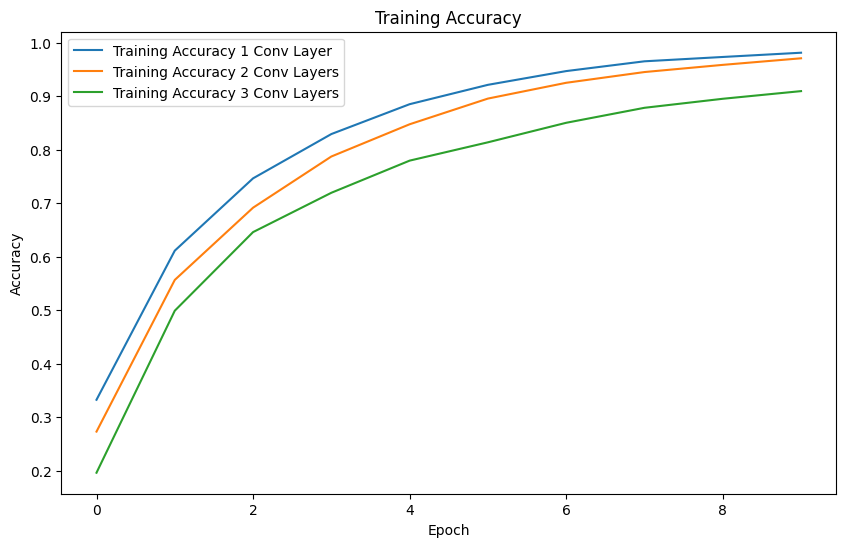

In [22]:
import matplotlib.pyplot as plt

# Function to plot training accuracy
def plot_training_accuracy(histories, labels):
    plt.figure(figsize=(10, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history['accuracy'], label='Training Accuracy ' + label)
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


# Plotting the training accuracies
plot_training_accuracy([hist_1, hist_2, hist_3], ["1 Conv Layer", "2 Conv Layers", "3 Conv Layers"])


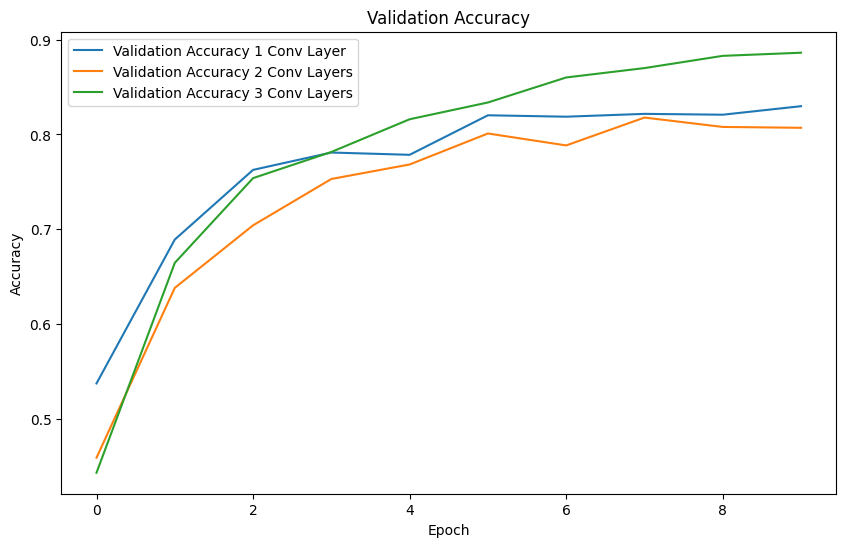

In [21]:
import matplotlib.pyplot as plt

# Function to plot validation accuracy
def plot_validation_accuracy(histories, labels):
    plt.figure(figsize=(10, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy ' + label)
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


# Plotting the validation accuracies
plot_validation_accuracy([hist_1, hist_2, hist_3], ["1 Conv Layer", "2 Conv Layers", "3 Conv Layers"])
